## Problem Statement



The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

    The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

    All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Application_data

In [3]:
df = pd.read_csv(r"C:\Users\Vishnu07\Desktop\M.sc. Data Science\Class notes\EDA\application_data.csv")

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


 2Identifying the structure of the Dataset

In [5]:
df.shape

(307511, 122)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Data Cleaning

In [8]:
# Calculating the percentage of the missing values for all columns
round(df.isnull().sum()/len(df)*100,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [9]:
# Removing the columns having missing values > 30%
df = df.loc[:, 100*df.isnull().sum()/len(df) < 30]
df.shape

(307511, 72)

In [10]:
# Retriving the columns which has any null values
df_columns=df.columns[df.isnull().any()].tolist()
df[df_columns].isnull().sum()*100/len(df)

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

From the above list, Following columns that have less % missing values are AMT_ANNUITY ,AMT_GOODS_PRICE ,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2 ,OBS_30_CNT_SOCIAL_CIRCLE,
DEF_30_CNT_SOCIAL_CIRCLE ,OBS_60_CNT_SOCIAL_CIRCLE ,DEF_60_CNT_SOCIAL_CIRCLE ,DAYS_LAST_PHONE_CHANGE

So, let's impute appropriate values on those columns

In [11]:
# AMT_ANNUITY
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [12]:
# we can imput 24903-Median value in plcae of missing values
value = 24903.00
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=value

In [13]:
# AMT_GOODS_PRICE
values = df.AMT_GOODS_PRICE.median()
df.loc[df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= values

In [14]:
df['AMT_GOODS_PRICE'].isnull().sum()

0

In [15]:
# NAME_TYPE_SUITE
df.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [16]:
# Since, it is a categorical column taking mode to imput missing values
val = df.NAME_TYPE_SUITE.mode()
df.loc[df['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']= val[0]

In [17]:
df.NAME_TYPE_SUITE.isnull().sum()

0

In [18]:
# CNT_FAM_MEMBERS
df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [19]:
# we can imput value 2.0 inplace of missing vaues
value = 2.0
df.loc[df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']= value

In [20]:
# EXT_SOURCE_2
df.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

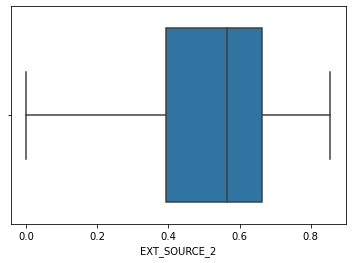

In [21]:
sns.boxplot(df['EXT_SOURCE_2'])
plt.show()

In [22]:
# we can imput median values
value = df.EXT_SOURCE_2.median()
df.loc[df['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']= value

In [23]:
df.EXT_SOURCE_2.isnull().sum()

0

In [24]:
# OBS_30_CNT_SOCIAL_CIRCLE
var = df.OBS_30_CNT_SOCIAL_CIRCLE.median() 
df.loc[df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_30_CNT_SOCIAL_CIRCLE']= var

In [25]:
# DEF_30_CNT_SOCIAL_CIRCLE
df.loc[df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_30_CNT_SOCIAL_CIRCLE'] = df.DEF_30_CNT_SOCIAL_CIRCLE.median()

In [26]:
#OBS_60_CNT_SOCIAL_CIRCLE
#DEF_60_CNT_SOCIAL_CIRCLE
df.loc[df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_60_CNT_SOCIAL_CIRCLE'] = df.OBS_60_CNT_SOCIAL_CIRCLE.median()
df.loc[df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_60_CNT_SOCIAL_CIRCLE'] = df.DEF_60_CNT_SOCIAL_CIRCLE.median()

In [27]:
df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()
df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
# Finding count of unique values in each column
print(df.nunique().sort_values())

REG_CITY_NOT_LIVE_CITY             2
FLAG_EMAIL                         2
FLAG_DOCUMENT_9                    2
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
                               ...  
AMT_ANNUITY                    13672
DAYS_REGISTRATION              15688
DAYS_BIRTH                     17460
EXT_SOURCE_2                  119831
SK_ID_CURR                    307511
Length: 72, dtype: int64


In [30]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# As we can see there are some negative valus in the following coluns so, lets make it absolute.
# converting negative DAYS_BIRTH value to positive value
df['DAYS_BIRTH']=df['DAYS_BIRTH'].abs()
# converting negative DAYS_EMPLOYED value to positive value
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].abs()
# converting negative DAYS_REGISTRATION value to positive value
df['DAYS_REGISTRATION']=df['DAYS_REGISTRATION'].abs()
# converting negative DAYS_ID_PUBLISH value to positive value
df['DAYS_ID_PUBLISH']=df['DAYS_ID_PUBLISH'].abs()
# converting negative DAYS_LAST_PHONE_CHANGE value to positive value
df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].abs()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# conversion of columns integer to categorical
for col in df.columns:
    if df[col].nunique() <= 3: # here considering columns with 3 unique values as categorical variables
        df[col] = df[col].astype(object)

df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking Outliers

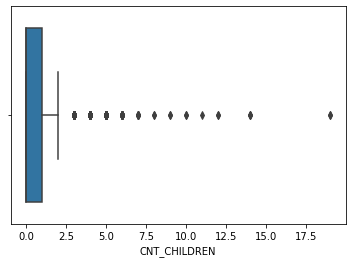

In [33]:
# CNT_CHILDREN
sns.boxplot(df['CNT_CHILDREN'])
plt.show()

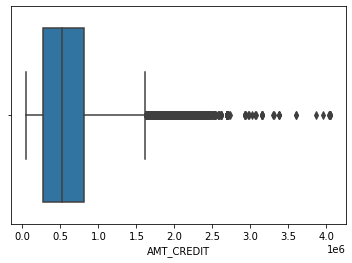

In [34]:
# AMT_CREDIT
sns.boxplot(df['AMT_CREDIT'])
plt.show()

In [35]:
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
print("The amount credited greater than {} can be considered as an outlier".format(upperwhisker))

The amount credited greater than 1616625.0 can be considered as an outlier


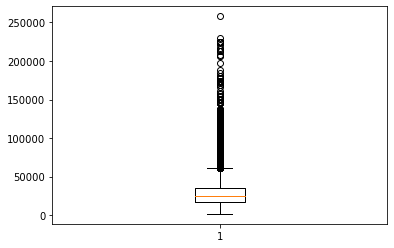

In [36]:
# AMT_ANNUITY
data=df['AMT_ANNUITY']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

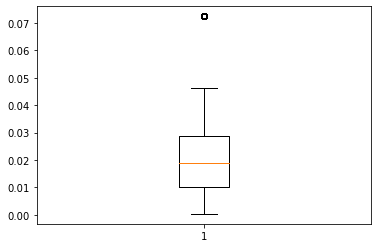

In [37]:
# REGION_POPULATION_RELATIVE
plt.boxplot(df['REGION_POPULATION_RELATIVE'])
plt.show()

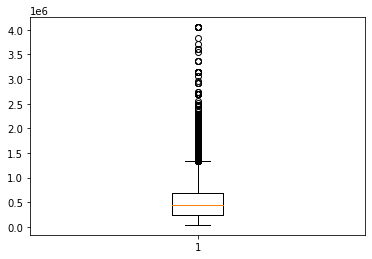

In [38]:
data=df['AMT_GOODS_PRICE']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

In [39]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Binning values into bucket

In [40]:
# Binning of continuous variables.
# To Check if we need to bin any variable in different categories. 
# AMT_INCOME_TOTAL
q1=df['AMT_INCOME_TOTAL'].quantile(0.25)
q2=df['AMT_INCOME_TOTAL'].quantile(0.50)
q3=df['AMT_INCOME_TOTAL'].quantile(0.75)
m=df['AMT_INCOME_TOTAL'].max()

# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values
df['AMT_INCOME_TOTAL_bin'] = pd.cut(df['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])

In [41]:
df.AMT_INCOME_TOTAL_bin.value_counts()

medium    82213
High      71538
Low       53182
Name: AMT_INCOME_TOTAL_bin, dtype: int64

In [42]:
# AMT_CREDIT
q1=df['AMT_CREDIT'].quantile(0.25)
q2=df['AMT_CREDIT'].quantile(0.50)
q3=df['AMT_CREDIT'].quantile(0.75)
m=df['AMT_CREDIT'].max()

# Binning AMT_CREDIT into AMT_CREDIT_bin so we don't loose data and have binned values
df['AMT_CREDIT_bin'] = pd.cut(df['AMT_CREDIT'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
df.AMT_CREDIT_bin.value_counts()

medium    77786
High      75876
Low       75428
Name: AMT_CREDIT_bin, dtype: int64

### ANALYSIS

In [43]:
#Checking the imbalance percentage.
(100*df.TARGET.value_counts()/ len(df))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### From the above result, In application_data there exists 91.927118% of "not default" and 8.072882% of "default" customers.

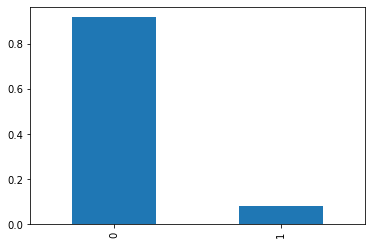

In [44]:
(df.TARGET.value_counts()/ len(df)).plot.bar()
plt.show()

### Performing Univariate Analysis

In [45]:
# so, the data is imbalanced
# Divide the data into two sets, i.e., Target-1 and Target-0
application_data_1 = df[df['TARGET']==1]
application_data_0 = df[df['TARGET']==0]

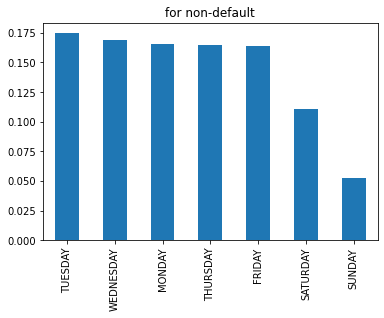

In [46]:
# Perferming analysis for one column at a time
# Univariate analysis for categoriacal variables for both 0 and 1
# WEEKDAY_APPR_PROCESS_START (categorical ordered variable)

# for TARGET=0
application_data_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

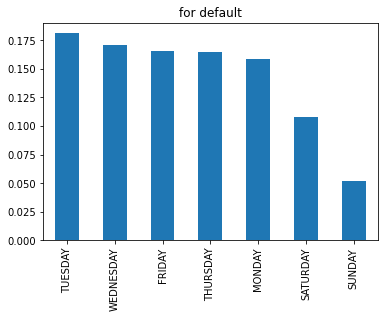

In [47]:
# for TARGET=1
application_data_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

#### From the above graphs we can conclude that application starting processes will be less in saturday and sunday.

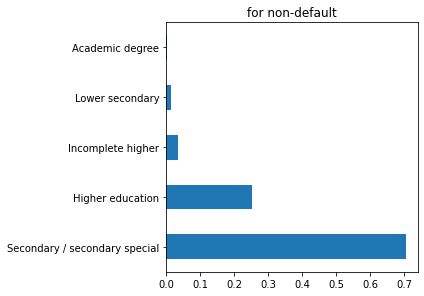

In [48]:
# NAME_EDUCATION_TYPE (categorical ordered variable)
# for Target=0
application_data_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.tight_layout()
plt.title('for non-default')
plt.show()

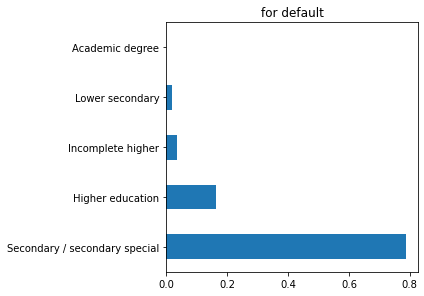

In [49]:
# for Target=1
application_data_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.tight_layout()
plt.title('for default')
plt.show()

#### From the plot above, we can conclude that secondary/special educated people are applying loans high in number and Academic degree educated people are applying loan in least count -  for both target= 0 and 1.

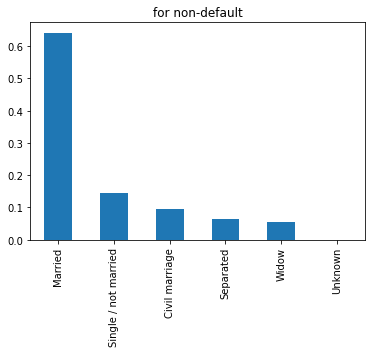

In [50]:
# NAME_FAMILY_STATUS 
# for TARGET=0
application_data_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

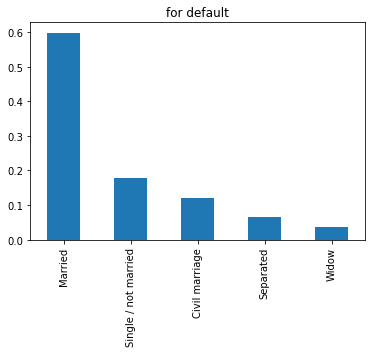

In [51]:
# for TARGET=1
application_data_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

#### It also shows that there exists few(1 or 2) unknown values in not default client family status.

#### We can say more married people tend to take more Loan as compaired to other categories

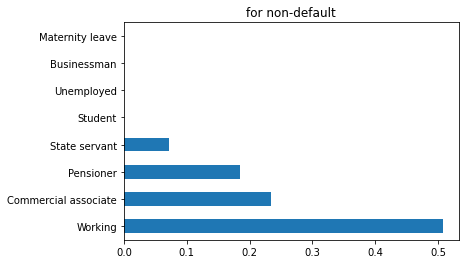

In [52]:
# NAME_INCOME_TYPE
# for TARGET=0
application_data_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

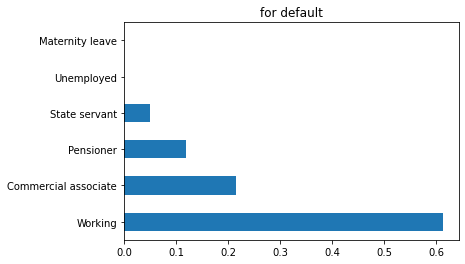

In [53]:
# for TARGET=1
application_data_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

### From the graphs ABOVE, we can conclude that,
- It shows that majority of defaulters income type is working. 
- Pensioner of not default case are high in number compared to Pensioner of default case.
- It seems there exists both loss and profit due to Pension people to the Bank.


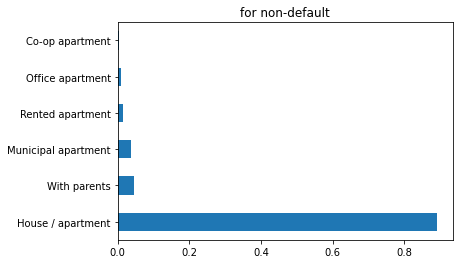

In [54]:
# NAME_HOUSING_TYPE
# for TARGET=0
application_data_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

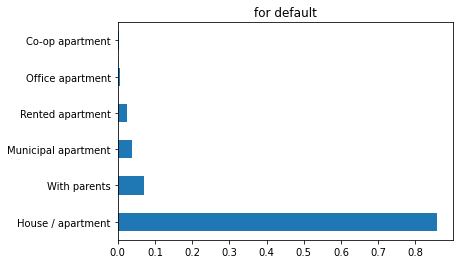

In [55]:
# for TARGET=1
application_data_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()


 'From graph we can conclude that there exists people who have own houselies in both default and non default'

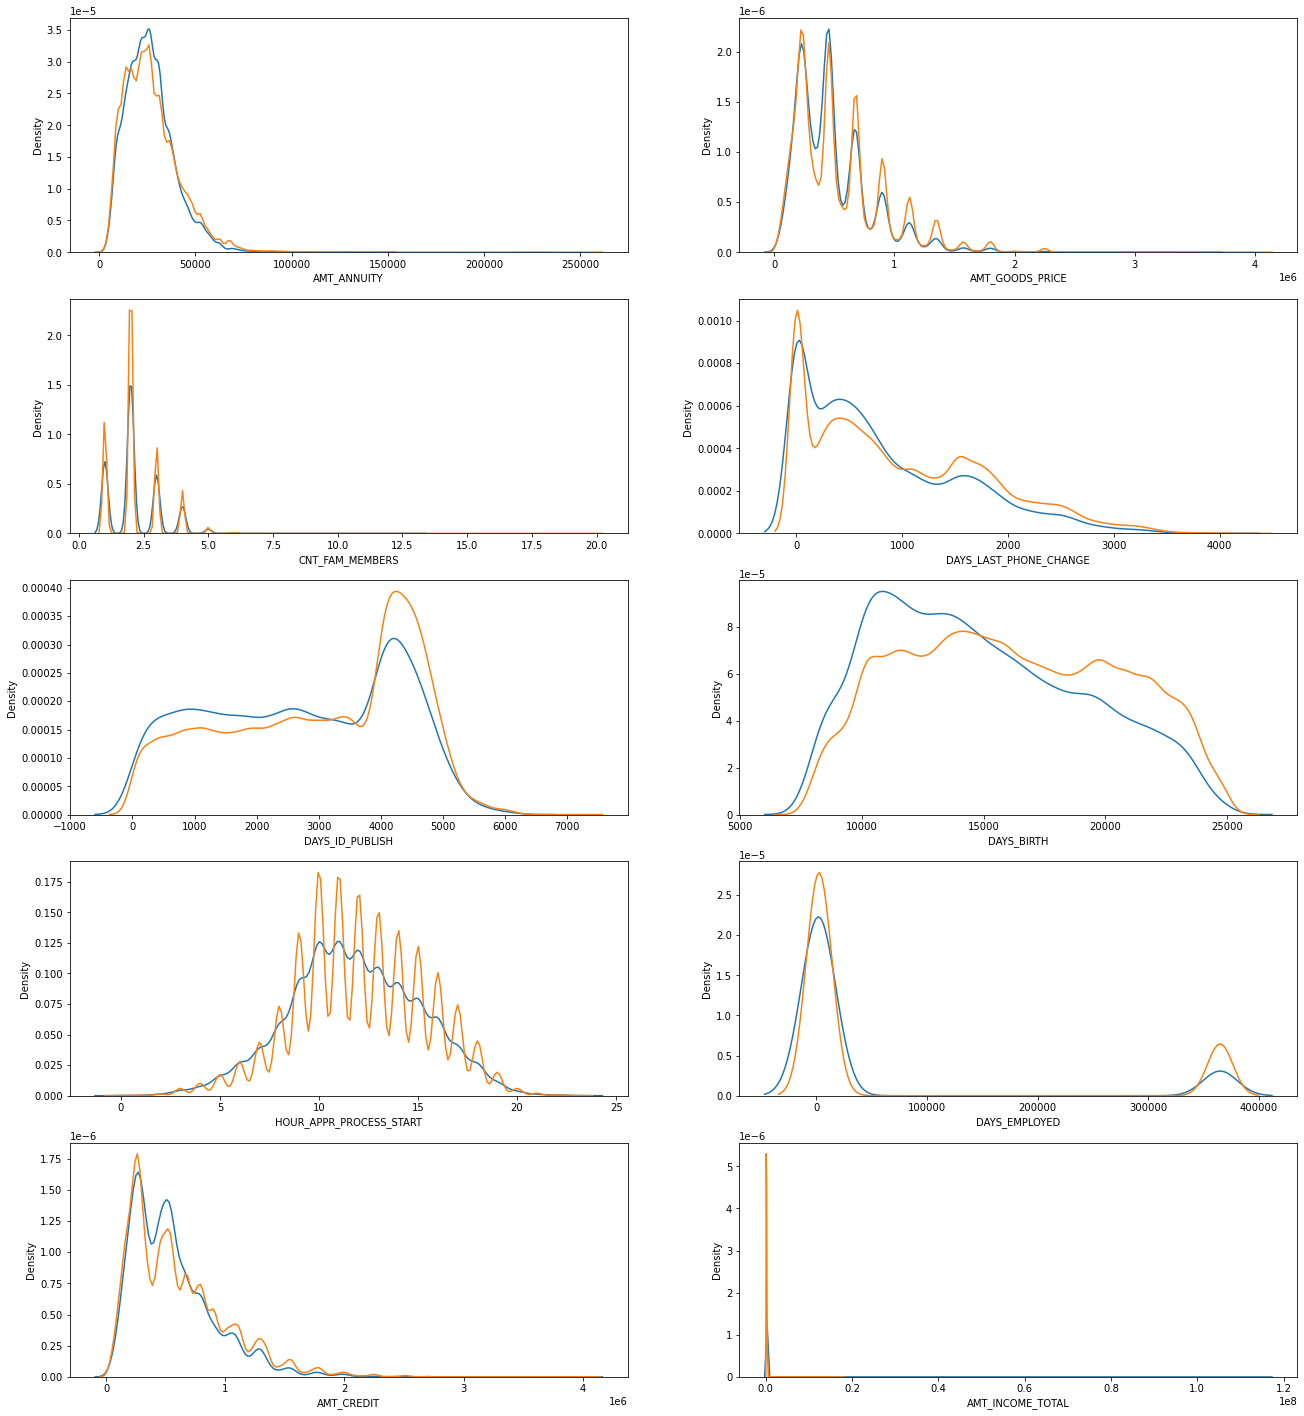

In [56]:
#considering 10 continous numerical columns
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(application_data_1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(application_data_0[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()    


Insights

As we can see from graphs:
- People with lower total income are more likely to default
- People who just got employed tends to take more loans
- People who retired tends to take more loans
- High number of applications are filed in 10 AM to 2 PM
- People with age between 27yrs(10000-days) and 41(15000-days) yrs tend to take more loans
- People whose id(s) got published between 4000 days and 5000 days ago tend to take more loans
- nuclear family tends to take more loans
- for less goods amount people take loans
- low amount annuity has high number of loans

### Correlation

Finding correlation for numerical column for both cases of target column

In [57]:
target0_corr=application_data_0.iloc[0:,2:]
target1_corr=application_data_1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [58]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001320,-0.025551,-0.375639,-0.205693,-0.180517,0.019986,...,-0.001227,0.022261,-0.001691,0.009667,0.001279,0.000760,-0.001295,-0.001233,-0.007722,-0.044217
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485689,0.419720,0.097772,-0.093515,-0.095898,-0.076387,-0.035931,...,-0.033058,-0.029555,-0.034187,0.063206,0.002692,0.006026,0.009407,0.073695,0.027426,0.061557
AMT_CREDIT,0.002315,0.416017,1.000000,0.831885,0.984995,0.053570,0.057151,0.017986,-0.009416,0.001982,...,-0.015078,0.004398,-0.018235,0.077383,-0.003655,0.000362,-0.004833,0.045454,0.024427,-0.035046
AMT_ANNUITY,0.024767,0.485689,0.831885,1.000000,0.829802,0.058591,-0.011740,-0.030195,-0.037717,-0.016570,...,-0.017900,-0.007722,-0.020250,0.068006,0.003495,0.002631,0.011850,0.050658,0.022428,0.001118
AMT_GOODS_PRICE,-0.001320,0.419720,0.984995,0.829802,1.000000,0.062625,0.058342,0.022717,-0.009501,0.004042,...,-0.016314,0.003433,-0.019047,0.082193,-0.002793,0.000615,-0.004278,0.046299,0.025166,-0.037110
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062625,1.000000,0.030730,-0.003651,0.036684,0.010463,...,0.028014,0.011268,0.023408,0.036490,-0.004555,-0.000730,-0.004799,0.048535,-0.001181,0.004876
DAYS_BIRTH,-0.375639,-0.093515,0.057151,-0.011740,0.058342,0.030730,1.000000,0.583711,0.298130,0.261979,...,-0.000403,-0.021128,-0.002301,0.067576,-0.004558,-0.002876,0.001635,-0.013089,0.011576,0.061824
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,0.022717,-0.003651,0.583711,1.000000,0.201306,0.259900,...,0.008631,-0.000374,0.006128,0.086290,-0.000893,0.000184,0.002578,-0.007851,0.012346,0.041381
DAYS_REGISTRATION,-0.180517,-0.076387,-0.009416,-0.037717,-0.009501,0.036684,0.298130,0.201306,1.000000,0.094153,...,-0.002404,-0.013219,-0.003568,0.051918,0.003547,0.001472,0.002519,0.006138,0.000074,0.021553
DAYS_ID_PUBLISH,0.019986,-0.035931,0.001982,-0.016570,0.004042,0.010463,0.261979,0.259900,0.094153,1.000000,...,-0.001926,0.004824,-0.004572,0.070416,-0.004817,0.000099,0.002464,0.007989,0.010705,0.032853


In [59]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007564,-0.031628,-0.267862,-0.127943,-0.133658,0.027320,...,-0.003296,0.031349,-0.005557,-0.012812,0.000564,-0.011009,-0.004516,-0.013416,-0.015320,-0.036691
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362476,0.051463,0.007238,-0.036127,-0.036671,0.005929,...,-0.019239,0.000884,-0.023243,0.081241,0.010661,-0.002371,0.018841,0.079795,0.025086,0.081913
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.976430,0.039919,0.155216,0.082434,0.017099,0.053780,...,-0.021312,0.019540,-0.028423,0.098580,0.002944,-0.004877,0.002992,0.044705,-0.019015,-0.026472
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804099,0.023297,0.030483,-0.003396,-0.035900,0.014472,...,-0.019458,0.009831,-0.026152,0.074302,0.014390,-0.004444,0.030202,0.065508,-0.003439,-0.005174
AMT_GOODS_PRICE,-0.007564,0.362476,0.976430,0.804099,1.000000,0.054091,0.157714,0.092653,0.019180,0.059710,...,-0.018918,0.021279,-0.025695,0.110539,0.006148,-0.005004,0.003654,0.047975,-0.015987,-0.026230
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054091,1.000000,0.046398,0.020003,0.034315,0.023668,...,0.048842,0.030434,0.038901,0.041326,-0.005804,0.000816,-0.002187,0.049689,-0.014709,0.008659
DAYS_BIRTH,-0.267862,0.007238,0.155216,0.030483,0.157714,0.046398,1.000000,0.466526,0.232940,0.251626,...,-0.011804,-0.005897,-0.013463,0.100163,-0.015904,-0.001271,0.003331,-0.005324,0.010736,0.080880
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.092653,0.020003,0.466526,1.000000,0.148988,0.209881,...,-0.003631,0.012263,-0.003974,0.131330,-0.011467,0.001024,0.003701,-0.004917,-0.001745,0.055502
DAYS_REGISTRATION,-0.133658,-0.036671,0.017099,-0.035900,0.019180,0.034315,0.232940,0.148988,1.000000,0.095750,...,-0.010820,-0.020997,-0.008588,0.057693,0.001959,0.003078,-0.004176,-0.013722,0.007161,0.010568
DAYS_ID_PUBLISH,0.027320,0.005929,0.053780,0.014472,0.059710,0.023668,0.251626,0.209881,0.095750,1.000000,...,-0.007667,0.013323,-0.006562,0.102175,-0.002735,0.013353,-0.003583,0.009518,-0.008408,0.044789


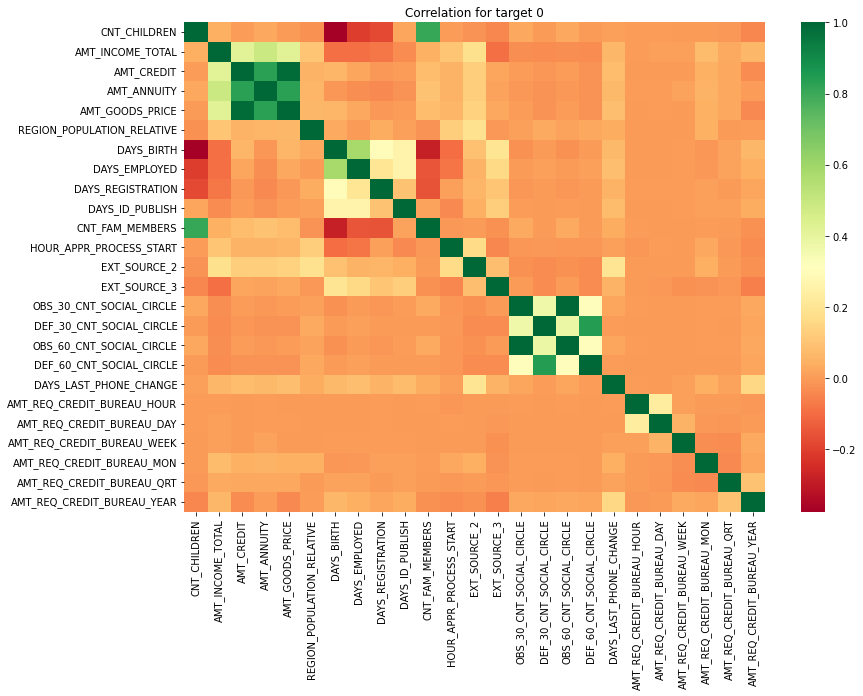

In [60]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize
plt.figure(figsize=(13, 9))
sns.heatmap(data=target0, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 0')
plt.yticks(rotation=0)
plt.show()

- Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
- Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
- Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
- less children client have in densely populated area.
- Credit amount is higher to densely populated area.
- The income is also higher in densely populated area.

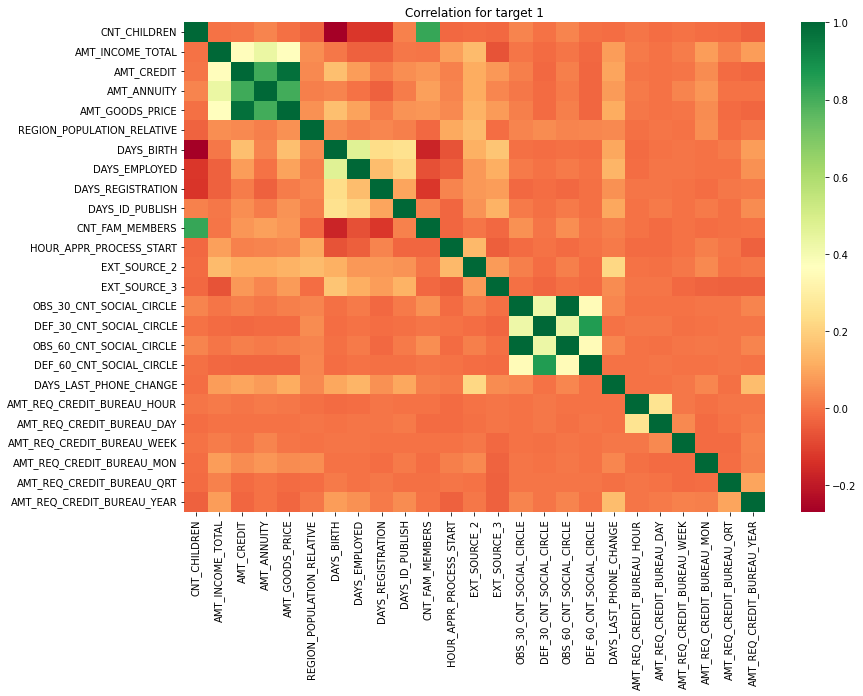

In [61]:
plt.figure(figsize=(13, 9))
sns.heatmap(data=target1, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 1')
plt.yticks(rotation=0)
plt.show()

### Performing Bi-variate Analysis

In [62]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604


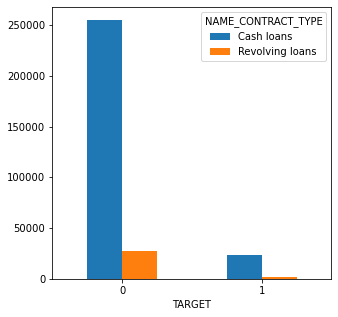

In [63]:
#Bi-variate categorical plots

table_1= pd.crosstab(index=df['TARGET'],columns=df['NAME_CONTRACT_TYPE'])
print(table_1)
table_1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

From the above plot we get there are high no of cash loans.

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0


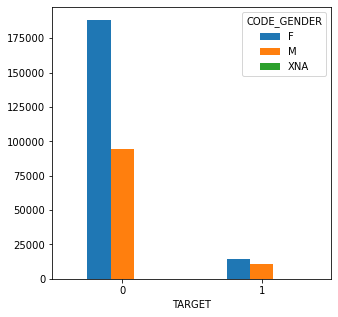

In [64]:
table_2= pd.crosstab(index=df['TARGET'],columns=df['CODE_GENDER'])
print(table_2)
table_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

From the above results we get females take more loans

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37140              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                          10475         229411  
1                            895          20407  


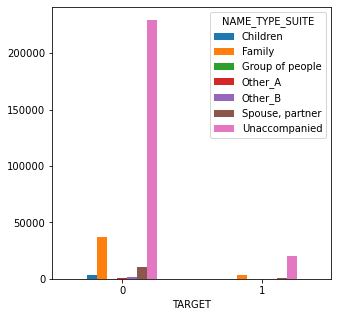

In [65]:
table_3= pd.crosstab(index=df['TARGET'],columns=df['NAME_TYPE_SUITE'])
print(table_3)
table_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


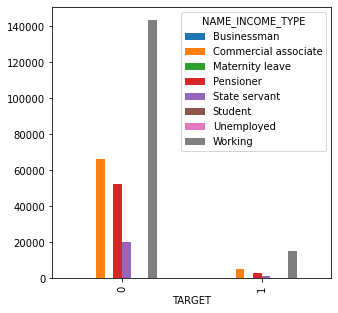

In [66]:
table_4= pd.crosstab(index=df['TARGET'],columns=df['NAME_INCOME_TYPE'])
print(table_4)
table_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251596                10228   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  


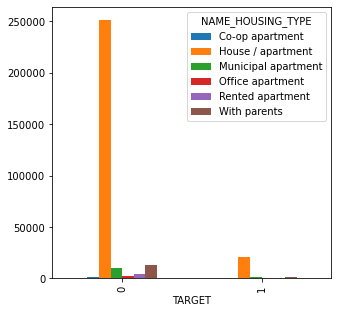

In [67]:
table_5= pd.crosstab(index=df['TARGET'],columns=df['NAME_HOUSING_TYPE'])
print(table_5)
table_5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

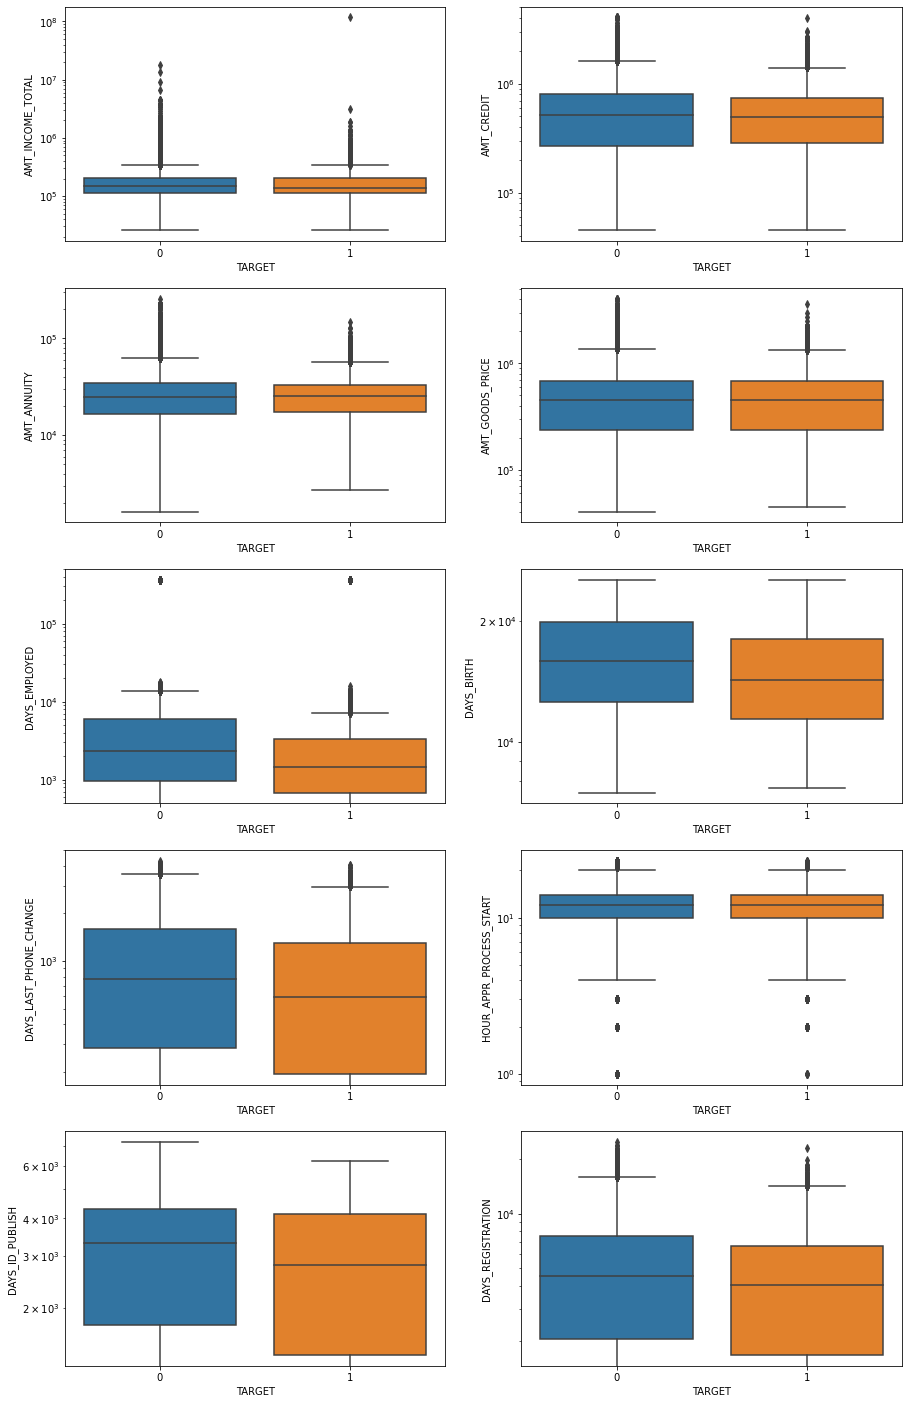

In [68]:
#Bi-variate continuous plots
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=df[i[1]].dropna(),data=df)
    plt.yscale('log')
plt.show() 

Insights
- For few not default clients, time taken to publish id's are higher than default clients.
- The application process start hours taken for default and not default cases are similar.
- In non default cases, people keep their phone numbers for greater time.
- In non default case AMT_GOODS PRICE contains more outlers than default case.
- In default case, most of the clients amount annuity tends to be greater than 25000(median value).
- Whose credit amount is greater than 50000 tends to be less default than compared to default cases and vice versa.
- people with higher no of employment days are less likely to default.
- Majority of defaulting people are having less total income.

### Reading Previous_application data

In [69]:
pwd

'C:\\Users\\Vishnu07'

In [70]:
df2 = pd.read_csv(r"C:\Users\Vishnu07\Desktop\M.sc. Data Science\Class notes\EDA\previous_application.csv")
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df2.shape

(1670214, 37)

In [72]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [73]:
# checking of missing values percentage
round((100*df2.isnull().sum()/len(df2)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [74]:
# removing those columns which are having null percentage greater than 50%
# AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED 

df2=df2.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [75]:
# converting -ve values to +ve
df2['DAYS_DECISION']=df2['DAYS_DECISION'].abs()
df2['SELLERPLACE_AREA']=df2['SELLERPLACE_AREA'].abs()
df2['DAYS_FIRST_DUE']=df2['DAYS_FIRST_DUE'].abs()
df2['DAYS_LAST_DUE_1ST_VERSION']=df2['DAYS_LAST_DUE_1ST_VERSION'].abs()
df2['DAYS_LAST_DUE']=df2['DAYS_LAST_DUE'].abs()
df2['DAYS_TERMINATION']=df2['DAYS_TERMINATION'].abs()
df2['DAYS_FIRST_DRAWING']=df2['DAYS_FIRST_DRAWING'].abs()

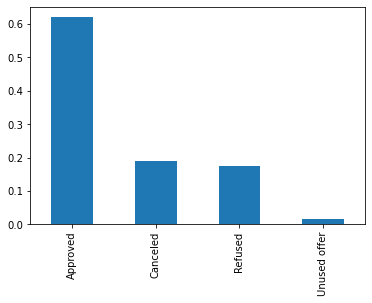

In [76]:
(df2.NAME_CONTRACT_STATUS.value_counts()/len(df2)).plot.bar()
plt.show()

Merging application_data with previous_application data

In [77]:
df1_2 =pd.merge(df,df2,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
df1_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


### Univariate Analysis

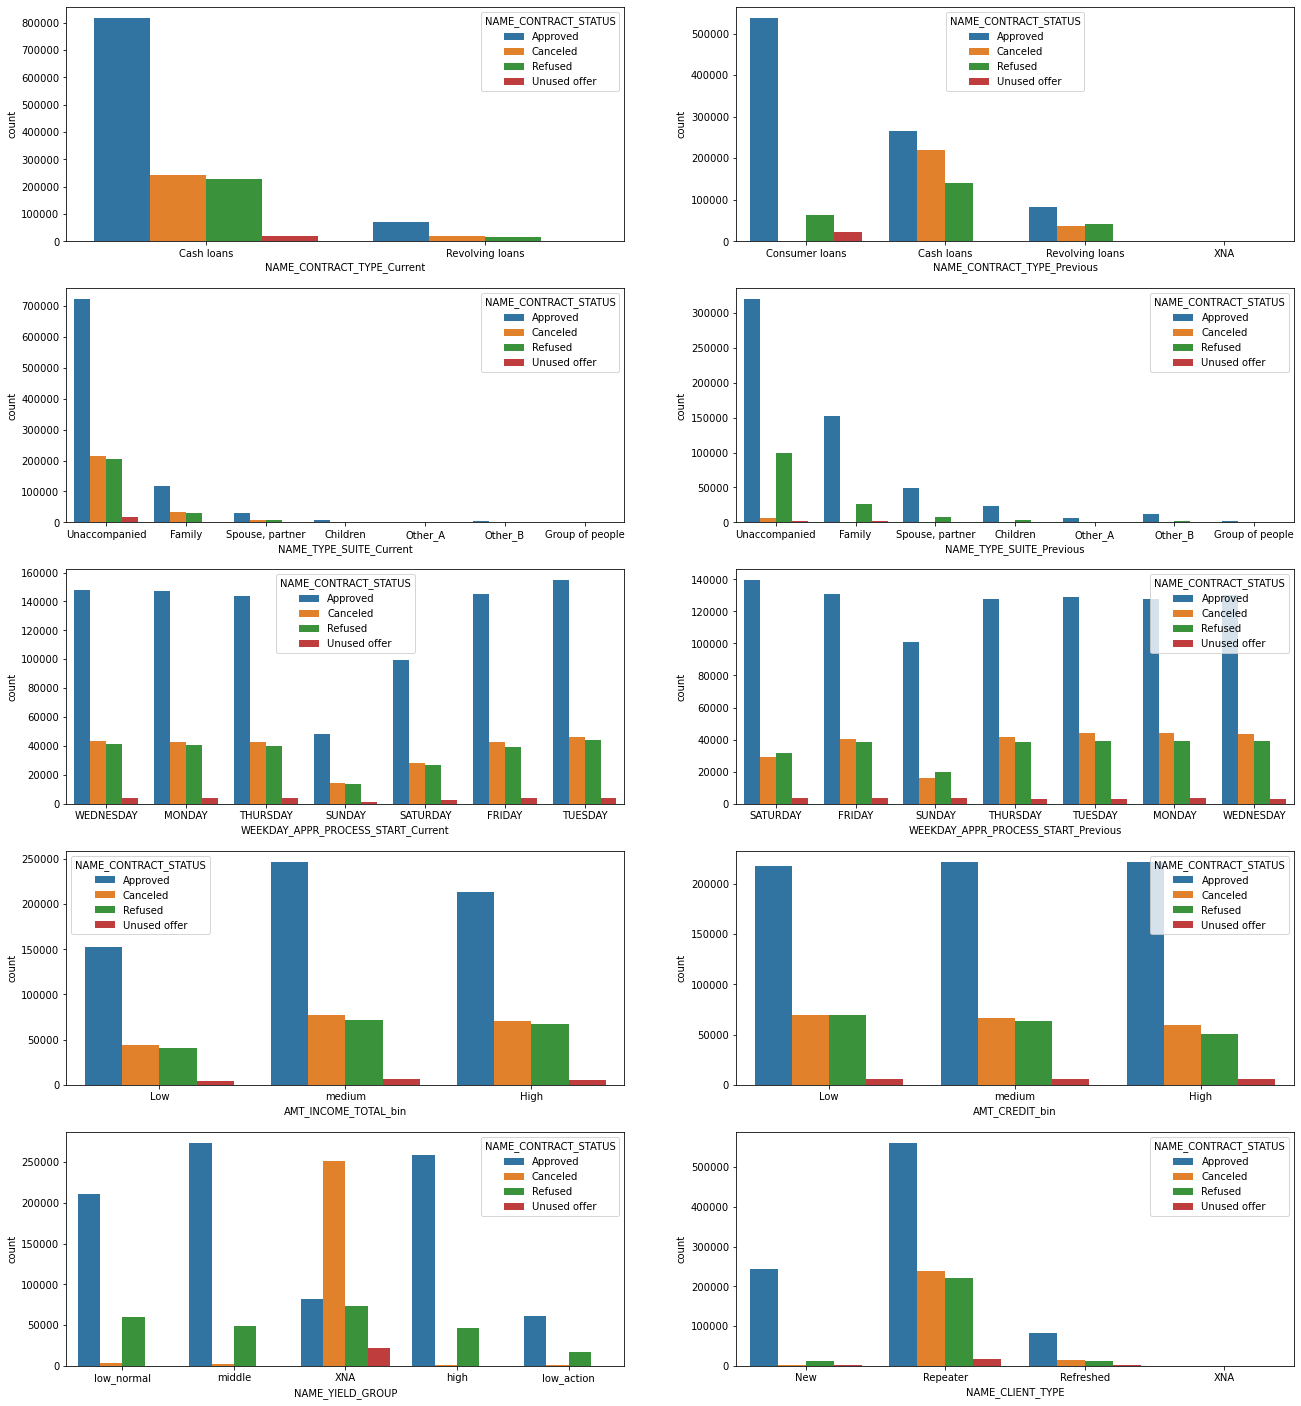

In [78]:
# Univariate Categorical analysis
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                     'WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=df1_2)
plt.show()

**Insights**
- Repeater has highest number of approved loans.
- Middle NAME_YIELD_GROUP has highest approval.
- Value of AMT_CREDIT_BIN does not affect loan approvals.
- For Medium AMT_INCOME_TOTAL_bin the approval is highest .
- In previous application saturday has the highest approval rate but in current application it is tuesday.
- For both NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current unaccompanied has the highest number.
- Previously bank was providing Cash, Revolving and Consumer loans.
- Currently, bank is only giving two types of loans Cash and Revolving Loans.
- Number of consumer loans were highest previously but now it is Cash loans.

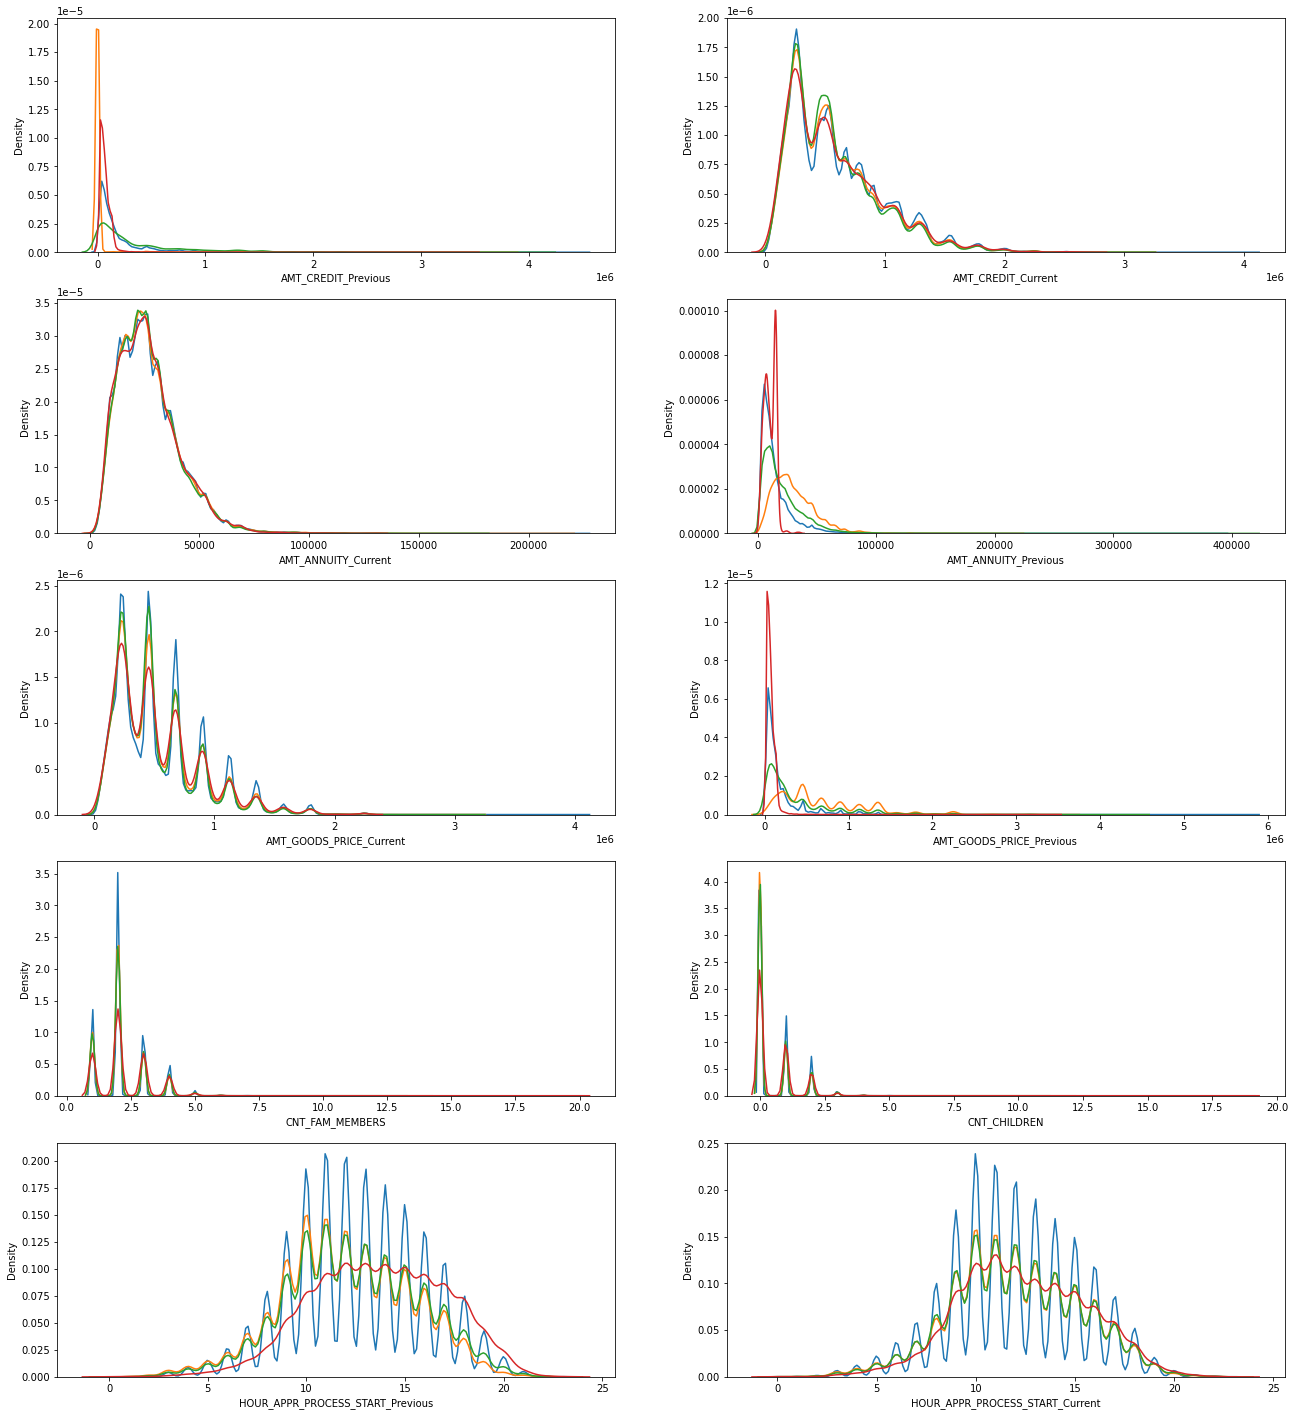

In [79]:
# Univariate Numerical analysis
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(df1_2.loc[df1_2.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(df1_2.loc[df1_2.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(df1_2.loc[df1_2.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(df1_2.loc[df1_2.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')
plt.show()

**Insights**
 
As we can see from graphs

- High number of applications are filed in 9 AM to 2 PM for both Current and Previous data.
- Nuclear family tends to take more loans.
- Previously bank had high unused offers but currently,
         refused is high incase of AMT_GOODS_PRICE.
         cancelled/refused offers are similar for AMT_ANNUITY.
         high number of refused offers for AMT_CREDIT.

Bi-Variate Analysis

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


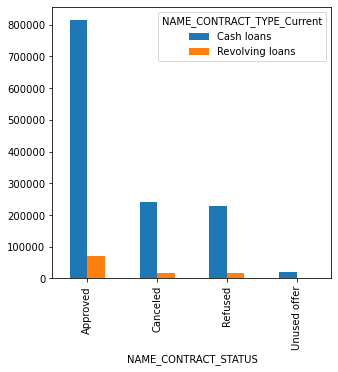

In [80]:
table_6= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_CONTRACT_TYPE_Current'])
print(table_6)
table_6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198507               10     170144   
Canceled                             59785                2      57674   
Refused                              58117                3      43802   
Unused offer                          5072                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61630       20          68   455720  
Canceled                      15679        3          16   126282  
Refused                       15597        1          38   127832  
Unused offer                   1518        0           1    14255  


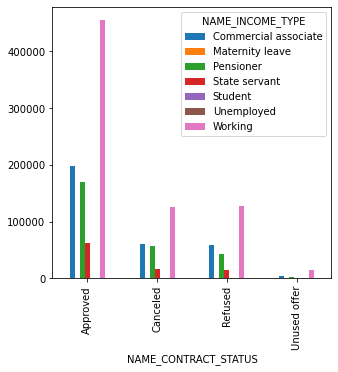

In [81]:
table_7= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_INCOME_TYPE'])
print(table_7)
table_7.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          418            195002              27676   
Canceled                           64             57074               7917   
Refused                            91             54051               8635   
Unused offer                        6              6718                983   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                        10929                         652074  
Canceled                         3099                         191287  
Refused                          2971                         179642  
Unused offer                      165                          14899  


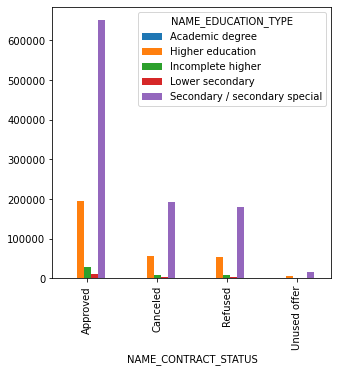

In [82]:
table_8= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_EDUCATION_TYPE'])
print(table_8)
table_8.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86827   577137      56750   
Canceled                       26143   167233      16535   
Refused                        28226   152167      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755  


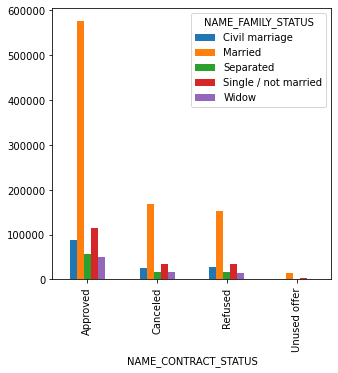

In [83]:
table_9= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_FAMILY_STATUS'])
print(table_9)
table_9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791667                33138   
Canceled                          629             234120                 9149   
Refused                           659             219301                 8544   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7319             12608         38579  
Canceled                          1926              3385         10232  
Refused                           2005              3514         11367  
Unused offer                       178               278          1436  


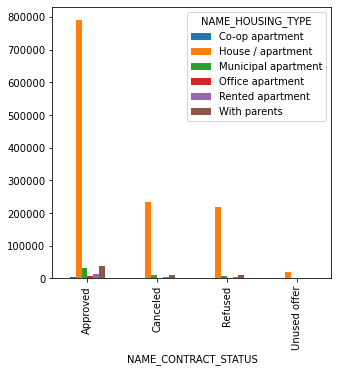

In [84]:
table_10= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_HOUSING_TYPE'])
print(table_10)
table_10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266381          537310            82408    0
Canceled                         220383            1329            37445  284
Refused                          139568           64282            41511   29
Unused offer                        432           22335                4    0


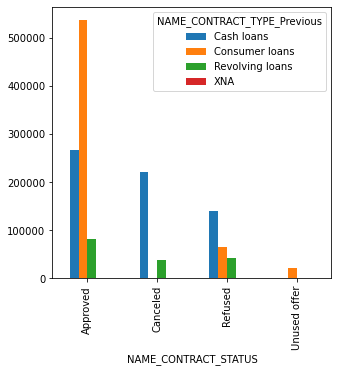

In [85]:
table_11= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_CONTRACT_TYPE_Previous'])
print(table_11)
table_11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242395      82891    560378  435
Canceled                2920      16104    239618  799
Refused                12358      12537    220215  280
Unused offer            1867       3404     17471   29


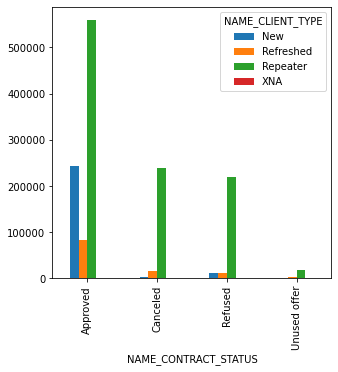

In [86]:
table_12= pd.crosstab(index=df1_2['NAME_CONTRACT_STATUS'],columns=df1_2['NAME_CLIENT_TYPE'])
print(table_12)
table_12.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Bi-Variate continous Numeric

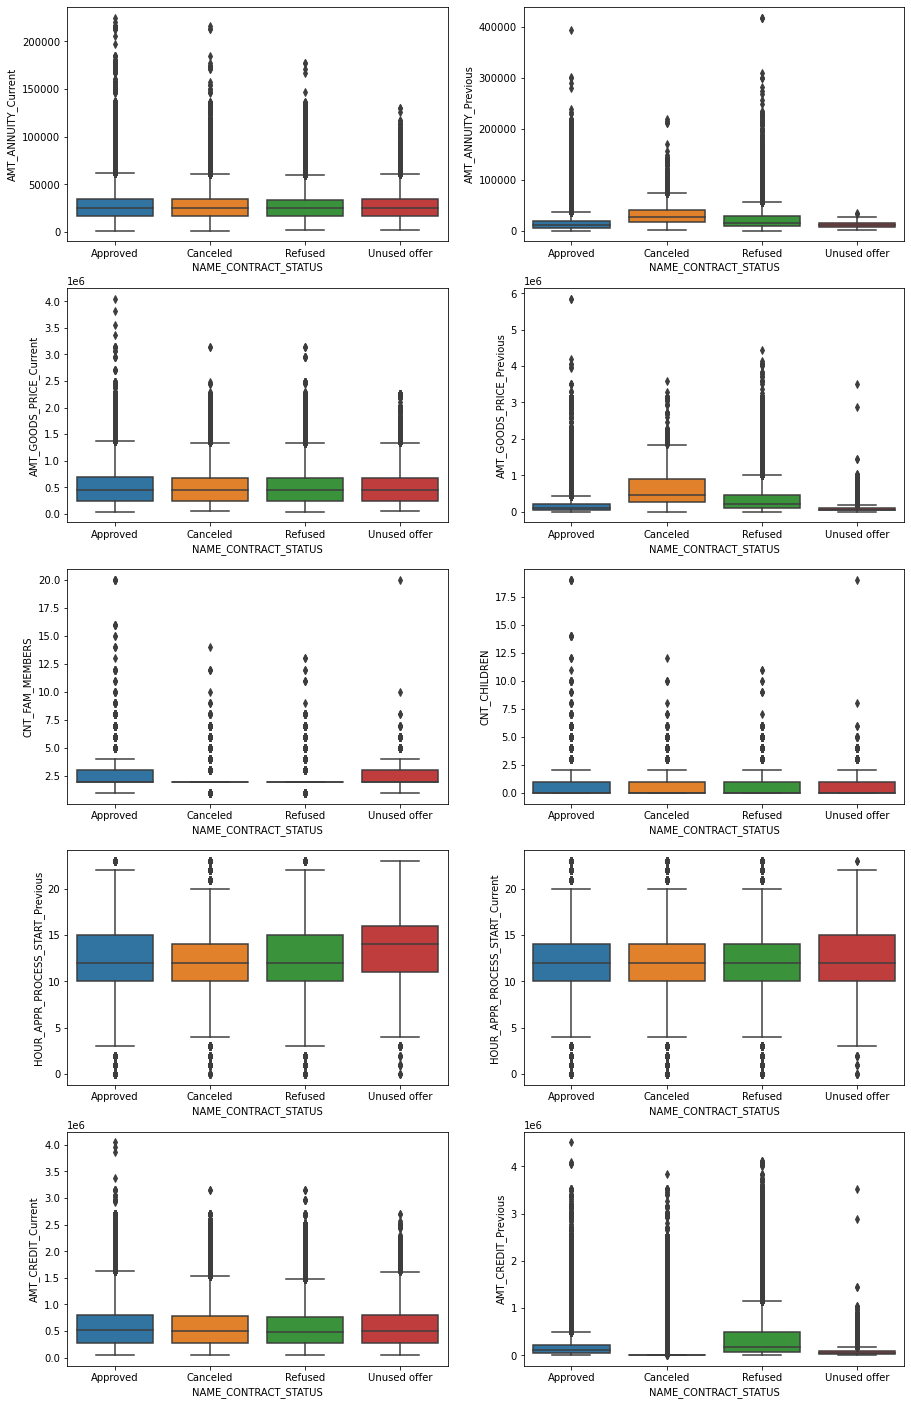

In [87]:
#Bi-variate continous plots
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=df1_2[i[1]].dropna(),data=df1_2)
plt.show() 

**Insights**

- AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current is similar for all 4 cases.
- Time spent in unused offer is higher as compared to other categories so, bank should reduce time spent on unused offer.
- Nuclear family(2-3 people in family) get highest approval.
- Previously most of the applications were cancelled or refused but now Refused/Cancelled/Approved/Unused all four have similar  situation for both AMT_GOODS_PRICE & AMT_ANNUITY.


### Conclusion

Target/focused variable for Application dataset - TARGET.

Target/focused variable for Previous dataset - NAME_CONTRACT_STATUS

Top Major variables to consider for loan prediction:

- NAME_EDUCATION_TYPE
- AMT_INCOME_TOTAL
- DAYS_BIRTH
- AMT_CREDIT
- DAYS_EMPLOYED
- AMT_ANNUITY
- NAME_INCOME_TYPE
- CODE_GENDER
- NAME_HOUSING_TYPE

The above mentioned variables are to be considered before approving application to minimize risk of loss.